In [1]:
from collections import defaultdict
from collections import namedtuple
import pandas as pd
import json
import time
import copy

In [2]:
feat = pd.read_table("clean/features.txt", sep=' ')
feat.head()

,chr,start,end,strand,type
0,1.0,335,649,+,gene
1,1.0,538,792,+,gene
2,1.0,1807,2169,-,gene
3,1.0,2480,2707,+,gene
4,1.0,7013,9049,-,gene


In [3]:
Feat = namedtuple('Feat', ['chr', 'start', 'end', 'strand', 'type'], defaults = (False,))

In [4]:
pos = defaultdict(list)
for row in feat.itertuples(index=False):
    for i in range(row.start, row.end+1):
        item = Feat(row.chr, row.start, row.end, row.strand, row.type)
        pos[(row.chr, i, row.strand)].append(item)

In [5]:
net = pd.read_table("clean/net.txt", sep=' ')
net.head()

,pos,value,chr,reads,strand
0,156,0.481988,1,1,+
1,5793,0.481988,1,1,+
2,5871,0.481988,1,1,+
3,5883,0.481988,1,1,+
4,5889,0.481988,1,1,+


In [6]:
pos[(14, 230108, "-")]

f = set()
for i in range(230105, 230673):
    f.update(pos[(14, i, "-")])
    f.update(pos[(14, i, "+")])
    

In [26]:
f

{Feat(chr=14.0, start=230105, end=230672, strand='-', type='snRNA_gene'),
 Feat(chr=14.0, start=230126, end=230670, strand='-', type='other')}

In [18]:
feat[(feat["start"] == 230105)]

,chr,start,end,strand,type
15343,14.0,230105,230672,-,snRNA_gene


In [20]:
net[(net["chr"] == 14) & (net["pos"] >= 230105) & (net["pos"] < 230672)].sum()

pos                                               129469231
value                                          62348.499177
chr                                                    7868
reads                                                129357
strand    ++++++++++++++++++++++++----------------------...
dtype: object

<Axes: xlabel='pos', ylabel='reads'>

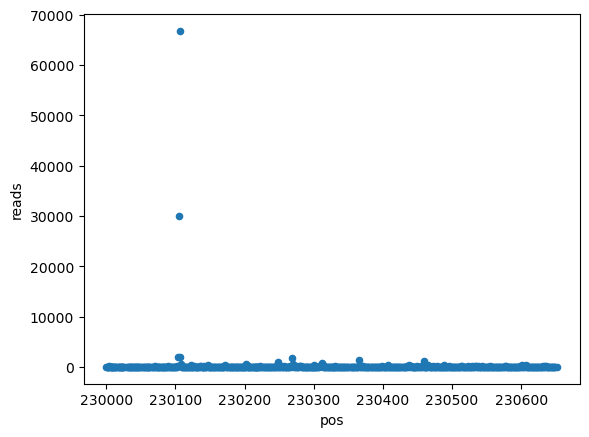

In [30]:
net[(net["chr"] == 14) & (net["pos"] >= 230000) & (net["pos"] < 230672)].plot.scatter(x="pos", y="reads")

In [31]:
f = set()
for i in range(939667, 939671):
    f.update(pos[(7, i, "-")])
    f.update(pos[(7, i, "+")])
f

{Feat(chr=7.0, start=939459, end=939672, strand='-', type='snRNA_gene'),
 Feat(chr=7.0, start=939494, end=939672, strand='-', type='snRNA_gene'),
 Feat(chr=7.0, start=939508, end=939676, strand='-', type='other')}

<Axes: xlabel='pos', ylabel='reads'>

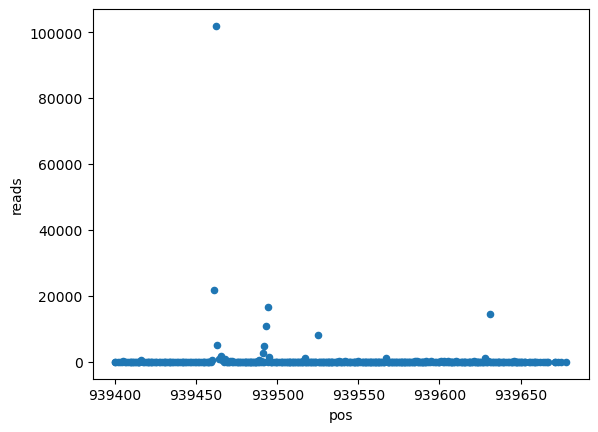

In [33]:
net[(net["chr"] == 7) & (net["pos"] >= 939400) & (net["pos"] < 939680)].plot.scatter(x="pos", y="reads")

In [32]:
f = set()
for i in range(680740, 680746):
    f.update(pos[(2, i, "-")])
    f.update(pos[(2, i, "+")])
f

{Feat(chr=2.0, start=680401, end=681865, strand='-', type='other'),
 Feat(chr=2.0, start=680688, end=681862, strand='-', type='snRNA_gene')}

<Axes: xlabel='pos', ylabel='reads'>

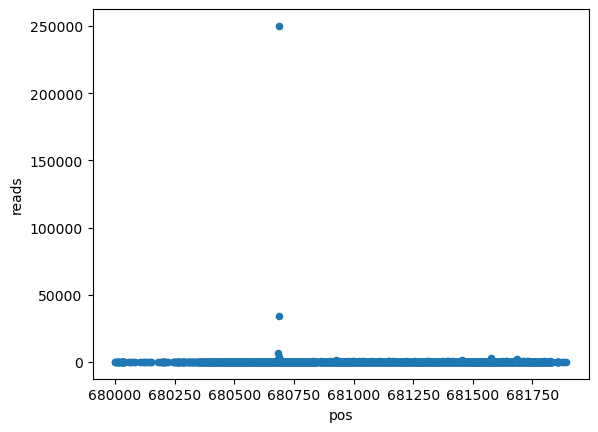

In [34]:
net[(net["chr"] == 2) & (net["pos"] >= 680000) & (net["pos"] < 681900)].plot.scatter(x="pos", y="reads")